This practice comes from [2023 Week 13 | Power BI: Create a connected scatterplot with image markers](https://workout-wednesday.com/pbi-2023-w13/).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
file_path = './datasets/KyotoFullFlower7.xlsx'
data = pd.read_excel(file_path, skiprows=25, ).dropna()
data.head()

C:\Users\chenyulue\mambaforge\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU


In [5]:
data.isna().sum()

AD                           0
Full-flowering date (DOY)    0
Full-flowering date          0
Source code                  0
Data type code               0
Reference Name               0
dtype: int64

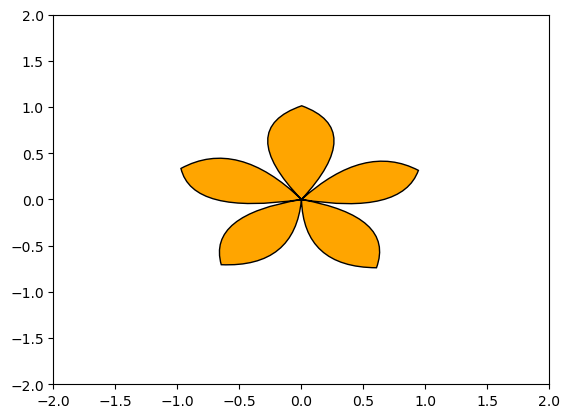

In [27]:
import matplotlib.path as mpath
import matplotlib.patches as patches

# Cherry path
verts = np.array([
    (0.002, 1.014), # M
    (-0.546, 0.762), (0, 0), # Q
    (-0.516, 0.669), (-0.972, 0.336),
    (-0.883, -0.174), (0, 0),
    (-0.761, -0.166), (-0.647, -0.706),
    (-0.052, -0.739), (0, 0),
    (0.015, -0.735), (0.605, -0.739),
    (0.757, -0.183), (0, 0),
    (0.812, -0.174), (0.943, 0.315),
    (0.511, 0.618), (0, 0),
    (0.524, 0.76), (0.002, 1.014),
    (0.002, 1.014)])
codes = [1] + [3] * 20 + [79]

cherry = mpath.Path(verts, codes)

fig, ax = plt.subplots()
patch = patches.PathPatch(cherry, facecolor='orange', lw=1)
ax.add_patch(patch)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()

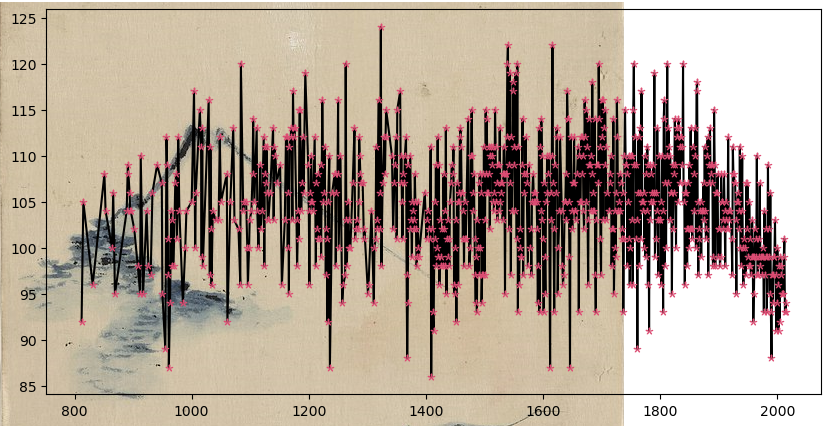

In [70]:
import matplotlib.image as image

img = image.imread('./datasets/cherry_bg.png')

fig, ax = plt.subplots(figsize=(10, 5))
# ax.imshow(img, resample=True, origin='lower')
ax.plot(data['AD'], data['Full-flowering date (DOY)'], marker=cherry,  c='k', mew=0.01, mfc='#DE4D74', mec='#DE4D74')

fig.figimage(img, zorder=-1) # Add a image as a background
ax.set_facecolor("#ffffff00") # Make the Axes background transparent